In [1]:
from tciaclient.core import TCIAClient
import skimage
import numpy as np
from PIL import Image
import pywt
import cv2
import pydicom

In [2]:
tc = TCIAClient()
collection_name = "NSCLC Radiogenomics"
series_seg = tc.get_series(collection=collection_name, modality="SEG")
series_ct = tc.get_series(collection=collection_name, modality="CT")
series_pt = tc.get_series(collection=collection_name, modality="PT")

In [4]:
PID = { 'R01-003','R01-004','R01-005','R01-006','R01-007','R01-012','R01-013','R01-014','R01-015','R01-016',
        'R01-017','R01-018','R01-021','R01-022','R01-023','R01-024','R01-026','R01-027','R01-028','R01-029',
        'R01-031','R01-032','R01-033','R01-034','R01-035','R01-037','R01-038','R01-039','R01-040','R01-041',
        'R01-042','R01-043','R01-046','R01-048','R01-049','R01-051','R01-052','R01-054','R01-055','R01-056',
        'R01-057','R01-059','R01-060','R01-061','R01-062','R01-063','R01-064','R01-065','R01-066','R01-067',
        'R01-068','R01-069','R01-071','R01-072','R01-073','R01-076','R01-077','R01-078','R01-079','R01-080',
        'R01-081','R01-083','R01-084','R01-089','R01-091','R01-093','R01-094','R01-096','R01-097','R01-098',
        'R01-099','R01-100','R01-101','R01-102','R01-103','R01-104','R01-105','R01-106','R01-107','R01-108',
        'R01-109','R01-110','R01-111','R01-112','R01-113','R01-114','R01-115','R01-116','R01-117','R01-118',
        'R01-119','R01-120','R01-121','R01-122','R01-123','R01-124','R01-125','R01-126','R01-127','R01-128',
        'R01-129','R01-130','R01-131','R01-132','R01-133','R01-134','R01-135','R01-136','R01-137','R01-138',
        'R01-139','R01-140','R01-141','R01-142','R01-144','R01-145','R01-146','R01-147','R01-148','R01-149',
        'R01-150','R01-151','R01-152','R01-153','R01-154','R01-156','R01-157','R01-158','R01-159','R01-160'}

In [3]:
len(series_pt)

480

In [ ]:
download_path = "./SEG"
for i, s in enumerate(series_seg):
    tc.get_image(seriesInstanceUid = s["SeriesInstanceUID"], downloadPath = download_path, zipFileName = s['PatientID'] + "-" +str(i).zfill(3)+".zip")
        

In [ ]:
download_path = "./PET"
for i, s in enumerate(series_pt):
    print(i)
    if (s['PatientID'] in PID):
        tc.get_image(seriesInstanceUid = s["SeriesInstanceUID"], 
                     downloadPath = download_path, zipFileName = s['PatientID'] + "-" +str(i).zfill(3)+".zip")
        

In [ ]:
download_path = "./CT"
for i, s in enumerate(series_ct):
    print(i)
    if (s['PatientID'] in PID):
        tc.get_image(seriesInstanceUid = s["SeriesInstanceUID"], 
                     downloadPath = download_path, zipFileName = s['PatientID'] + "-" +str(i).zfill(3)+".zip")

In [6]:
def extract_patient_name(item):
    match = re.search(r"LO: '([^']+)'", item)
    print(match.group(1))
    if match:
        return match.group(1)
    return None

def extract_series_number(item):
    match = re.search(r"IS: '([^']+)'", item)
    if match:
        return match.group(1)
    return '0'

In [8]:
len(series_ct)

727

In [5]:
ct_img = pydicom.dcmread('1-114.dcm', force=True)
ct_array = ct_img.pixel_array

ct_array.shape

(512, 512)

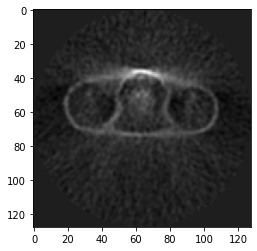

In [34]:
ct_img = pydicom.dcmread('1-114.dcm', force=True)
pt_img = pydicom.dcmread('1-071.dcm', force=True)

ct_array = ct_img.pixel_array
pt_array = pt_img.pixel_array
# Convert the numpy array to a PIL Image
image = Image.fromarray(pt_array)
# Upscale using bilinear interpolation
upscaled_image = image.resize((512, 512), Image.BILINEAR)
# Convert the PIL Image back to a numpy array
upscaled_array = np.array(upscaled_image)

vis = np.concatenate((ct_array, upscaled_array), axis=0)

plt.imshow(vis, cmap = 'gray')
plt.imshow(pt_array, cmap = 'gray')

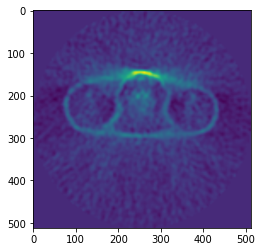

In [26]:
plt.imshow(upscaled_array)

### PET scans are very noisy will require denoising prior to fusion

In [25]:
upscaled_array.shape

(512, 512)

In [24]:
from PIL import Image

# Convert the numpy array to a PIL Image
image = Image.fromarray(pt_array)

# Upscale using bilinear interpolation
upscaled_image = image.resize((512, 512), Image.BILINEAR)

# Convert the PIL Image back to a numpy array
upscaled_array = np.array(upscaled_image)

In [23]:
512/128

4.0

In [90]:
dcm_img = pydicom.dcmread('1-114.dcm', force=True)
dcm_img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4334.1501.404093209880938749819275129417
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19931009'
(0008, 0013) Instance Creation Time              TM: '133748'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Insta

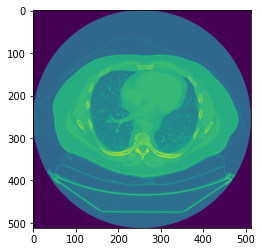

In [7]:
img_array = dcm_img.pixel_array

plt.imshow(img_array)

In [91]:
dcm2_img = pydicom.dcmread('1-071.dcm', force=True)
dcm2_img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Positron Emission Tomography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4334.1501.339015623963395615928543221235
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '19931009'
(0008, 0013) Instance Creation Time              TM: '135336'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.14519.5.2.

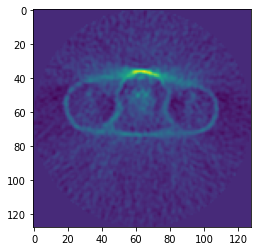

In [9]:
img_array = dcm_img.pixel_array

plt.imshow(img_array)

In [22]:
import pydicom
import pydicom_seg
import SimpleITK as sitk

dcm = pydicom.dcmread('1-275.dcm')

reader = pydicom_seg.SegmentReader()
result = reader.read(dcm)

for segment_number in result.available_segments:
    image_data = result.segment_data(segment_number)  # directly available
    image = result.segment_image(segment_number)  # lazy construction
    sitk.WriteImage(image, f'/tmp/segmentation-{segment_number}.nrrd', True)